In [7]:
install.packages("haven")
library(haven)

unemp_df <- read.csv("unemptotal.csv")
emp_df <- read.csv("emptotal.csv")
wf_df <- read.csv("wftotal.csv")
gc_df <- read.csv("genchartotal.csv")
mig_df <- read.csv("migrationtotal.csv")
comb_df <- read_dta("colombia.dta")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [8]:
head(comb_df["urb_rur_5yrs"])

urb_rur_5yrs
<dbl+lbl>
2
2
NA
1
NA
2


In [2]:
gc_add <- function(dat) {
    
    dat["less_primary_ed"] <- rep(0)
    dat["primary"] <- rep(0)
    dat["secondary"] <- rep(0)
    dat["university"] <- rep(0)
    dat["age_under18"] <- rep(0)
    dat["age_18_30"] <- rep(0)
    dat["age_31_45"] <- rep(0)
    dat["age_46_64"] <- rep(0)
    dat["age_65up"] <- rep(0)
    dat["contract_verbal"] <- rep(0)
    dat["contract_written"] <- rep(0)
    dat["factory_emp"] <- rep(0)
    dat["govt_emp"] <- rep(0)
    dat["domestic_worker"] <- rep(0)
    dat["self_employed"] <- rep(0)
    dat["employer"] <- rep(0)
    dat['unpaid_familywkr'] <- rep(0)
    dat["unpaid_worker"] <- rep(0)
    dat["born_Ven"] <- rep(0)
    dat["day_laborer"] <- rep(0)
    dat["firm_less5"] <- rep(0)
    dat["firm_5_10"] <- rep(0)
    dat["firm_11_30"] <- rep(0)
    dat["firm_31_50"] <- rep(0)
    dat["firm_51_100"] <- rep(0)
    dat["firm_more101"] <- rep(0)
    dat["occasional_work"] <- rep(0)
    dat["seasonal_work"] <- rep(0)
    dat["permenant_work"] <- rep(0)
    
    for(i in 1:nrow(dat)) {       # for-loop over rows
    if (is.na(dat[i, "female999"])) { 
    } else {dat[i,"female999"] <- dat[i,"female999"] - 1}
    }
    
    for(i in 1:nrow(dat)) {
    print(i)
    if (is.na(dat[i, "level_ed"])) {
        }
    else if (dat[i, "level_ed"] == 1 || dat[i, "level_ed"] ==2) {
        dat[i, "less_primary_ed"] <- 1
        }
    else if (dat[i, "level_ed"] == 3) {
        dat[i, "primary"] <- 1
        }
    else if (dat[i, "level_ed"] == 4 || dat[i, "level_ed"] == 5) {
        dat[i, "secondary"] <- 1
        }
    else if (dat[i, "level_ed"] == 6) {
        dat[i, "university"] <- 1
        }
    }
    
    for(i in 1:nrow(dat)) {
        if (is.na(dat[i, "age"])) {
            }
        else if (dat[i, "age"] < 18) {
            dat[i, "age_under18"] <- 1
            }
        else if (dat[i, "age"] >= 18 && dat[i, "age"] <= 30) {
            dat[i, "age_18_30"] <- 1
            }
        else if (dat[i, "age"] >= 31 && dat[i, "age"] <= 45) {
            dat[i, "age_31_45"] <- 1
            }
        else if (dat[i, "age"] >= 46 && dat[i, "age"] <= 64) {
            dat[i, "age_46_64"] <- 1
            }
        else if (dat[i, "age"] >= 65) {
            dat[i, "age_65up"] <- 1
            }
        }
   
   for(i in 1:nrow(dat)) {
        if (is.na(dat[i, "verbalwritten999"])) {
           }
        else if (dat[i, "verbalwritten999"] == 1) {
            dat[i, "contract_written"] <- 1
            }
        else if (dat[i, "verbalwritten999"] == 2) {
            dat[i, "contract_verbal"] <-1
            }
        else if (is.na(dat[i, "contract"])) {
            dat[i, "contract_verbal"] <- NA
            dat[i, "contract_written"] <- NA
            }
        }
    for(i in 1:nrow(dat)) {
        if (is.na(dat[i, "emp_status"])) {
            }
        else if (dat[i, "emp_status"] == 1) {
            dat[i, "factory_emp"] <- 1
            }
        else if (dat[i, "emp_status"] == 2) {
            dat[i, "govt_emp"] <- 1
            }
        else if (dat[i, "emp_status"] == 3) {
            dat[i, "domestic_worker"] <- 1
            }
        else if (dat[i, "emp_status"] == 4) {
            dat[i, "self_employed"] <- 1
            }
        else if (dat[i, "emp_status"] == 5) {
            dat[i, "employer"] <- 1
            }
        else if (dat[i, "emp_status"] == 6) {
            dat[i, "unpaid_familywkr"] <- 1
            }
        else if (dat[i, "emp_status"] == 7) {
            dat[i, "unpaid_worker"] <- 1
            }
        else if (dat[i, "emp_status"] == 8) {
            dat[i, "day_laborer"] <- 1
            }
        }
    for (i in 1:nrow(dat)) {
        if (is.na(dat[i, "birth_other_cntry"])) {
            }
        else if (dat[i, "birth_other_cntry"] == 2) {
            dat[i, "born_Ven"] <- 1
            }
        }
    
    for (i in 1:nrow(dat)) {
        if (is.na(dat[i, "freq_work"])) {
            }
        else if (dat[i, "freq_work"] == 1) {
            dat[i, "occasional_work"] <- 1
            }
        else if (dat[i, "freq_work"] == 2) {
            dat[i, "seasonal_work"] <- 1
            }
        else if (dat[i, "freq_work"] == 3) {
            dat[i, "permenant_work"] <- 1
            }
        }
    for (i in 1:nrow(dat)) {
        if (is.na(dat[i, "freq_work"])) {
            }
        else if (dat[i, "number_employees_firm"] <= 3) {
            dat[i, "firm_less5"] <- 1
           }
        else if (dat[i, "number_employees_firm"] == 4) {
            dat[i, "firm_5_10"] <- 1
            }
        else if (dat[i, "number_employees_firm"] == 5 || dat[i, "number_employees_firm"] == 6) {
            dat[i, "firm_11_30"] <- 1
            }
        else if (dat[i, "number_employees_firm"] == 7) {
            dat[i, "firm_31_50"] <- 1
            }
        else if (dat[i, "number_employees_firm"] == 8) {
            dat[i, "firm_51_100"] <- 1
            }
        else if (dat[i, "number_employees_firm"] == 9) {
            dat[i, "firm_more101"] <- 1
            }
        }
    for (i in 1:nrow(dat)) {
        if (is.na(dat[i, "technical_university"])) {
            }
        else if (dat[i, "technical_university"] == 3) {
            dat[i, "technical_university"] <- 1
        } else {dat[i, "technical_university"] <- 0}
        }
        
   }
    
    
    
    

Warning message:
“package ‘caret’ was built under R version 4.0.5”
Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Loading required package: lattice

Warning message:
“package ‘lattice’ was built under R version 4.0.5”
Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


   level_ed
1         3
2         5
3         6
4         5
5         5
6         4
7         3
8         3
9         6
10        6
11        5
12        6
13        3
14       NA
15        6
16        2
17        3
18        1
19        3
20        5


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



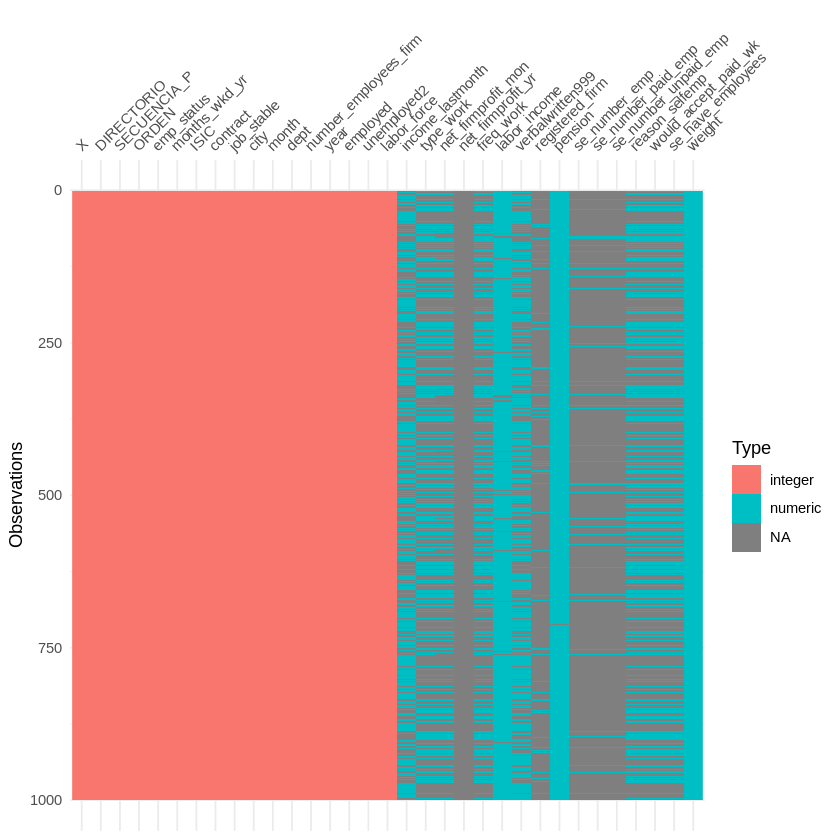

In [4]:
library(caret)
dmy <- dummyVars(" ~ level_ed", data = dat)
trsf <- data.frame(predict(dmy, newdata = dat))
print(trsf)
install.packages("visdat")
library("visdat")
vis_dat(emp_df[1:1000,])

In [45]:
dat

,X,DIRECTORIO,SECUENCIA_P,ORDEN,female999,age,household_role,level_ed,years_school,technical_university,health_insurance,month,dept,city,weight,year,less_primary_ed,primary,secondary,university
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,5332772,1,1,1,56,1,3,3,NA,1,1,68,68,299.7901,2021,0,1,0,0
2,2,5332772,1,2,0,53,2,5,11,2,1,1,68,68,299.7901,2021,0,0,1,0
3,3,5332772,1,3,1,18,3,6,11,2,1,1,68,68,299.7901,2021,0,0,0,1
4,4,5332773,1,1,0,20,1,5,10,1,2,1,68,68,293.4697,2021,0,0,1,0
5,5,5332773,1,2,1,17,2,5,11,2,1,1,68,68,293.4697,2021,0,0,1,0
6,6,5332774,1,1,0,43,1,4,7,NA,1,1,68,68,360.1812,2021,0,0,1,0
7,7,5332774,1,2,0,13,3,3,4,NA,1,1,68,68,360.1812,2021,0,1,0,0
8,8,5332774,1,3,0,6,3,3,1,NA,1,1,68,68,360.1812,2021,0,1,0,0
9,9,5332783,1,1,0,32,1,6,16,4,1,1,68,68,612.5614,2021,0,0,0,1


In [35]:
for(i in 1:nrow(dat)) {
    print(i)
    if (is.na(dat[i, "level_ed"])) {
        }
    else if (dat[i, "level_ed"] == 1 || dat[i, "level_ed"] ==2) {
        dat[i, "less_primary_ed"] <- 1
        }
    else if (dat[i, "level_ed"] == 3) {
        dat[i, "primary"] <- 1
        }
    else if (dat[i, "level_ed"] == 4 || dat[i, "level_ed"] == 5) {
        dat[i, "secondary"] <- 1
        }
    else if (dat[i, "level_ed"] == 6) {
        dat[i, "university"] <- 1
        }
    }

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20


In [36]:
head(dat)

,X,DIRECTORIO,SECUENCIA_P,ORDEN,female999,age,household_role,level_ed,years_school,technical_university,health_insurance,month,dept,city,weight,year,less_primary_ed,primary,secondary,university
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,5332772,1,1,1,56,1,3,3,NA,1,1,68,68,299.7901,2021,0,1,0,0
2,2,5332772,1,2,0,53,2,5,11,2,1,1,68,68,299.7901,2021,0,0,1,0
3,3,5332772,1,3,1,18,3,6,11,2,1,1,68,68,299.7901,2021,0,0,0,1
4,4,5332773,1,1,0,20,1,5,10,1,2,1,68,68,293.4697,2021,0,0,1,0
5,5,5332773,1,2,1,17,2,5,11,2,1,1,68,68,293.4697,2021,0,0,1,0
6,6,5332774,1,1,0,43,1,4,7,NA,1,1,68,68,360.1812,2021,0,0,1,0


In [33]:
i <- 14
print(dat[i, "level_ed"] == 1 || dat[i, "level_ed"] ==2)

[1] NA


In [44]:
head(emp_df["ISIC"])

,ISIC
,<int>
1,4210
2,5224
3,4520
4,9499
5,4321
6,3811


In [41]:
gc_add(gc_df)

In [42]:
dim(gc_df)

[1] 1041810      16

In [2]:
library(dplyr)
a <- full_join(emp_df, unemp_df, by=c("DIRECTORIO", "SECUENCIA_P", "ORDEN", "city", "month", "weight", "year", "employed", "unemployed2", "labor_force", "dept"))

Warning message:
“package ‘dplyr’ was built under R version 4.0.5”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
head(a)

,X.x,DIRECTORIO,SECUENCIA_P,ORDEN,emp_status,income_lastmonth,type_work,net_firmprofit_mon,net_firmprofit_yr,freq_work,⋯,city,month,dept,number_employees_firm,weight,year,employed,unemployed2,labor_force,X.y
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1,5332772,1,2,1,877803,NA,NA,NA,NA,⋯,68,1,68,4,299.7901,2021,1,0,1,NA
2,2,5332773,1,1,4,NA,6,800000,NA,3,⋯,68,1,68,1,293.4697,2021,1,0,1,NA
3,3,5332774,1,1,4,NA,6,150000,NA,3,⋯,68,1,68,1,360.1812,2021,1,0,1,NA
4,4,5332783,1,2,1,1100000,NA,NA,NA,NA,⋯,68,1,68,9,612.5614,2021,1,0,1,NA
5,5,5332785,1,1,4,NA,6,600000,NA,3,⋯,68,1,68,1,740.6426,2021,1,0,1,NA
6,6,5332785,1,6,1,877803,NA,NA,NA,NA,⋯,68,1,68,9,740.6426,2021,1,0,1,NA


In [4]:
colnames(a)

[1] "X.x"                   "DIRECTORIO"            "SECUENCIA_P"          
 [4] "ORDEN"                 "emp_status"            "income_lastmonth"     
 [7] "type_work"             "net_firmprofit_mon"    "net_firmprofit_yr"    
[10] "freq_work"             "months_wkd_yr"         "ISIC"                 
[13] "labor_income"          "contract"              "verbalwritten999"     
[16] "registered_firm"       "job_stable"            "pension"              
[19] "se_number_emp"         "se_number_paid_emp"    "se_number_unpaid_emp" 
[22] "reason_selfemp"        "would_accept_paid_wk"  "se_have_employees"    
[25] "city"                  "month"                 "dept"                 
[28] "number_employees_firm" "weight"                "year"                 
[31] "employed"              "unemployed2"           "labor_force"          
[34] "X.y"

In [5]:
b <- full_join(a, wf_df, by=c("DIRECTORIO", "SECUENCIA_P", "ORDEN", "city", "month", "weight", "year", "labor_force", "dept"))

In [6]:
colnames(b)

[1] "X.x"                   "DIRECTORIO"            "SECUENCIA_P"          
 [4] "ORDEN"                 "emp_status"            "income_lastmonth"     
 [7] "type_work"             "net_firmprofit_mon"    "net_firmprofit_yr"    
[10] "freq_work"             "months_wkd_yr"         "ISIC"                 
[13] "labor_income"          "contract"              "verbalwritten999"     
[16] "registered_firm"       "job_stable"            "pension"              
[19] "se_number_emp"         "se_number_paid_emp"    "se_number_unpaid_emp" 
[22] "reason_selfemp"        "would_accept_paid_wk"  "se_have_employees"    
[25] "city"                  "month"                 "dept"                 
[28] "number_employees_firm" "weight"                "year"                 
[31] "employed"              "unemployed2"           "labor_force"          
[34] "X.y"                   "X"                     "employed_lastwk"

In [7]:
c <- full_join(b, gc_df, by=c("DIRECTORIO", "SECUENCIA_P", "ORDEN", "city", "month", "weight", "year", "dept"))

In [8]:
colnames(c)

[1] "X.x"                   "DIRECTORIO"            "SECUENCIA_P"          
 [4] "ORDEN"                 "emp_status"            "income_lastmonth"     
 [7] "type_work"             "net_firmprofit_mon"    "net_firmprofit_yr"    
[10] "freq_work"             "months_wkd_yr"         "ISIC"                 
[13] "labor_income"          "contract"              "verbalwritten999"     
[16] "registered_firm"       "job_stable"            "pension"              
[19] "se_number_emp"         "se_number_paid_emp"    "se_number_unpaid_emp" 
[22] "reason_selfemp"        "would_accept_paid_wk"  "se_have_employees"    
[25] "city"                  "month"                 "dept"                 
[28] "number_employees_firm" "weight"                "year"                 
[31] "employed"              "unemployed2"           "labor_force"          
[34] "X.y"                   "X.x.x"                 "employed_lastwk"      
[37] "X.y.y"                 "female999"             "age"                  
[40] "household_role"        "level_ed"              "years_school"         
[43] "technical_university"  "health_insurance"

In [9]:
final_df <- full_join(c, mig_df, by=c("DIRECTORIO", "SECUENCIA_P", "ORDEN", "month", "weight", "year"))

In [10]:
colnames(final_df)

[1] "X.x"                   "DIRECTORIO"            "SECUENCIA_P"          
 [4] "ORDEN"                 "emp_status"            "income_lastmonth"     
 [7] "type_work"             "net_firmprofit_mon"    "net_firmprofit_yr"    
[10] "freq_work"             "months_wkd_yr"         "ISIC"                 
[13] "labor_income"          "contract"              "verbalwritten999"     
[16] "registered_firm"       "job_stable"            "pension"              
[19] "se_number_emp"         "se_number_paid_emp"    "se_number_unpaid_emp" 
[22] "reason_selfemp"        "would_accept_paid_wk"  "se_have_employees"    
[25] "city"                  "month"                 "dept"                 
[28] "number_employees_firm" "weight"                "year"                 
[31] "employed"              "unemployed2"           "labor_force"          
[34] "X.y"                   "X.x.x"                 "employed_lastwk"      
[37] "X.y.y"                 "female999"             "age"                  
[40] "household_role"        "level_ed"              "years_school"         
[43] "technical_university"  "health_insurance"      "X"                    
[46] "always_lived_mun"      "birthplace"            "birth_other_dept"     
[49] "birth_other_cntry"     "lived_5yrs_ago"        "lived_5yrs_dept"      
[52] "lived_5yrs_cntry"      "urb_rur_5yrs"          "lived_1yr_ago"        
[55] "lived_1yr_dept"        "lived_1yr_cntry"       "urb_rur_1yr"

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



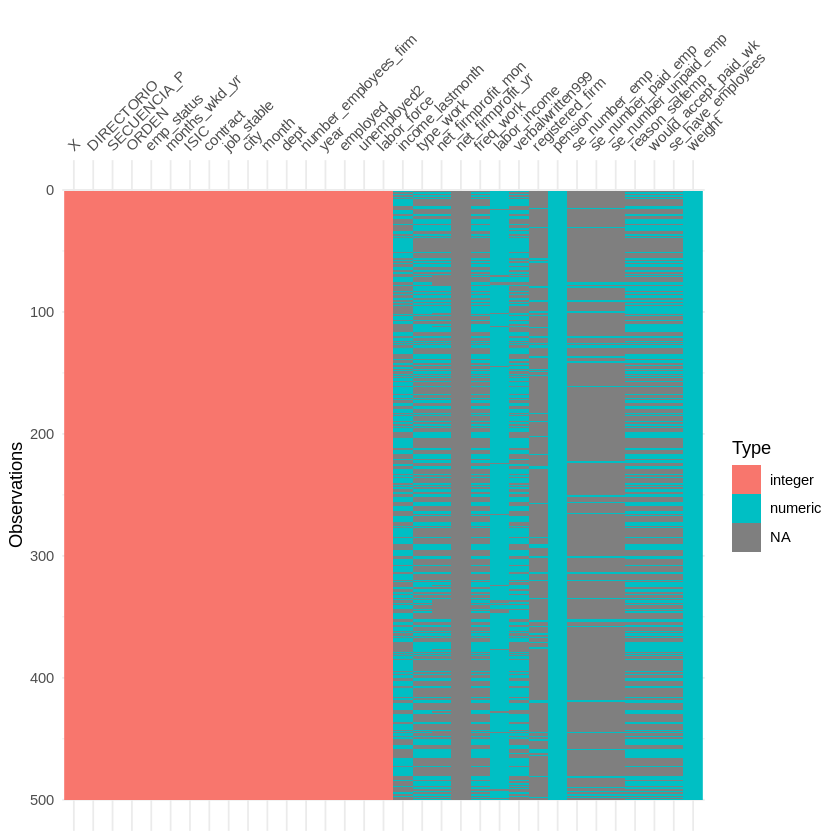

In [11]:
install.packages("visdat")
library("visdat")
vis_dat(emp_df[1:500,])

In [12]:
write.csv(final_df, "combined2021.csv")

In [13]:
dim(final_df)

[1] 2884563      57